<a href="https://colab.research.google.com/github/kangmg/g-xtb/blob/main/example/gxTB_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!uv pip install -q git+https://github.com/kangmg/g-xtb.git
!uv pip install -q randatoms

In [1]:
from gxtb import gxTB

gxtb command not found. Installing...
Installing g-xTB files...
Made /root/bin/gxtb executable
Added /root/bin to PATH
g-xTB installation completed!
Binary installed at: /root/bin/gxtb
Parameter files installed in: /root
~/bin has been added to PATH for this session.


In [47]:
%%time

from gxtb import gxTB
from ase.build import molecule

atoms = molecule('CH3COOH')
atoms.calc = gxTB()

energy = atoms.get_potential_energy()
forces = atoms.get_forces()

print(f"Energy(eV): {energy}\n")
print(f"Forces(eV/A):\n{forces}")

Energy(eV): -6234.324033251757

Forces(eV/A):
[[-0.08503571  0.47253095 -0.        ]
 [-0.17758876 -1.33287617 -0.        ]
 [ 0.36060651  1.03630925 -0.        ]
 [ 0.12016845 -0.54167629 -0.        ]
 [-0.19764073  0.25393871 -0.        ]
 [-0.05957149 -0.10414178 -0.        ]
 [ 0.01953087  0.10795766 -0.1220042 ]
 [ 0.01953087  0.10795766  0.1220042 ]]
CPU times: user 18.8 ms, sys: 2.08 ms, total: 20.9 ms
Wall time: 269 ms


In [48]:
from randatoms import randomatoms
from ase.visualize import view

atoms = randomatoms(is_periodic=False, seed=1234)

view(atoms, viewer='x3d')

In [49]:
%%time

from gxtb import gxTB

atoms.info['charge'] = 0
atoms.info['uhf'] = 0

atoms.calc = gxTB() # or gxTB(charge=0, uhf=0)

energy = atoms.get_potential_energy()
forces = atoms.get_forces()

print(f"Energy(eV): {energy}\n")
print(f"Forces(eV/A):\n{forces}")

Energy(eV): -20993.981581541604

Forces(eV/A):
[[-0.16682758  0.19811776  0.10231079]
 [-0.60507437 -0.09544354 -0.50433848]
 [ 0.38906031 -0.15958868  0.17360097]
 [ 0.37302695 -0.50180933  0.43254676]
 [ 0.1785747   0.47061884 -0.4171173 ]
 [-0.6226168  -0.04369304  0.00936718]
 [-0.05232822 -0.02886926 -0.03922622]
 [-0.03353532  0.06332841  0.07269452]
 [ 0.04966164  0.00537879 -0.04121945]
 [ 0.01281756  0.08074433  0.01999372]
 [ 0.00326484 -0.00822046 -0.03035157]
 [-0.11321952 -0.06190523 -0.213302  ]
 [ 0.62859758  0.35920848  0.07271667]
 [ 0.17972019 -0.47489827  0.34737592]
 [-0.38639473  0.40804297 -0.19060333]
 [-0.66130575 -0.27257575  0.16658801]
 [ 1.37804486 -0.04228575 -0.06972139]
 [-0.74831459  0.24506896 -0.06021227]
 [ 0.18893025  0.03510793 -0.0343625 ]
 [-0.10449723 -0.07313022  0.04556313]
 [-0.13914153  0.08924101 -0.03779851]
 [ 0.25569638 -0.01352572  0.01359038]
 [-0.10960203  0.02941337  0.12767847]
 [ 0.10546241 -0.20832559  0.05422648]]
CPU times: user 

In [51]:
%%time

from ase.optimize import BFGS
from ase.io import read
import numpy as np
from gxtb import gxTB

atoms.calc = gxTB(keep_files=True, capture_stdout=True) # keep temp files e.g. .CHRG .UHF energy gradient etc.

opt = BFGS(atoms, trajectory='test.traj')
assert opt.run(fmax=0.03), "Optimization Failed ..."

# atoms.calc.clear_files() # remove temp files

      Step     Time          Energy          fmax
BFGS:    0 06:46:28   -20993.981582        1.380455
BFGS:    1 06:46:37   -20994.019171        0.470410
BFGS:    2 06:46:46   -20994.028404        0.233852
BFGS:    3 06:46:54   -20994.031634        0.186501
BFGS:    4 06:47:03   -20994.034542        0.112239
BFGS:    5 06:47:12   -20994.036978        0.097328
BFGS:    6 06:47:20   -20994.038443        0.116837
BFGS:    7 06:47:29   -20994.039586        0.088590
BFGS:    8 06:47:38   -20994.040390        0.075262
BFGS:    9 06:47:46   -20994.041095        0.057610
BFGS:   10 06:47:55   -20994.041796        0.052423
BFGS:   11 06:48:04   -20994.042512        0.060931
BFGS:   12 06:48:12   -20994.043166        0.075009
BFGS:   13 06:48:21   -20994.043702        0.060596
BFGS:   14 06:48:30   -20994.044162        0.052239
BFGS:   15 06:48:38   -20994.044654        0.048254
BFGS:   16 06:48:47   -20994.045122        0.044633
BFGS:   17 06:48:56   -20994.045529        0.037276
BFGS:   18 06:

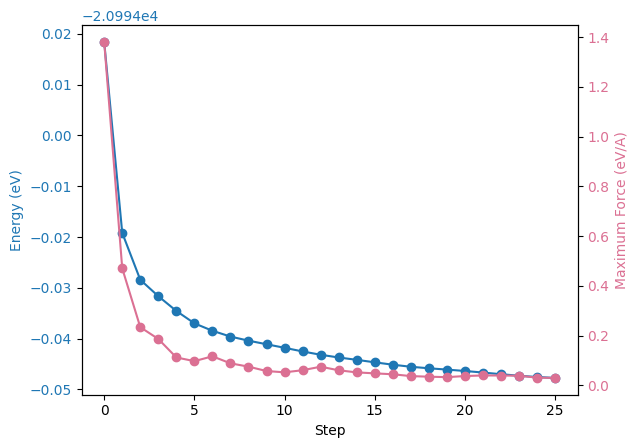

In [52]:
#@title optimization history
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

traj = read('test.traj', index=':')

energy_history = [atoms.get_potential_energy() for atoms in traj]
fmax_history = [np.max(np.linalg.norm(atoms.get_forces(), axis=1)) for atoms in traj]


# Plot energy history on the left y-axis
color_energy = 'tab:blue'
ax1.plot(energy_history, color=color_energy, marker='o', linestyle='-')
ax1.set_xlabel("Step")
ax1.set_ylabel("Energy (eV)", color=color_energy)
ax1.tick_params(axis='y', labelcolor=color_energy)

# Create a second y-axis for fmax history
ax2 = ax1.twinx()
color_fmax = 'palevioletred'
ax2.plot(fmax_history, color=color_fmax, marker='o', linestyle='-')
ax2.set_ylabel("Maximum Force (eV/A)", color=color_fmax)
ax2.tick_params(axis='y', labelcolor=color_fmax)

# Remove grid
ax1.grid(False)
ax2.grid(False)

# Show the plot
plt.show()

In [54]:
print(atoms.calc.stdout)

 coord file:TMP_gxtb.xyz
 preliminary g-xTB(EEQ BC) version: Tue Jun 24 12:03:37 CEST 2025
 approximates wB97M-V/def2-TZVPPD
 reading g-xTB parameter file ~/.gxtb
 basis read.
 reading ... TMP_gxtb.xyz
 reading EEQ BC parameter file ~/.eeq
 
                      -------------------------------
                          E E Q (BC)  c h a r g e s
                        Sun Dec 15 12:18:58 CET 2024
                      -------------------------------
 
dipole moment  X         Y          Z
        2.747799       -0.930077       -0.588507  total     (au/Debye)      :     2.9600     7.5238
 
           CN       q_CN    CN(basis)   q
    1 O    0.7195  -0.1585   0.7415  -0.2790
    2 C    1.6943   0.2278   1.8759   0.1526
    3 N    1.6821  -0.2513   1.6805  -0.0855
    4 C    1.8062   0.0256   2.0099   0.0305
    5 C    1.7172  -0.0752   1.8740  -0.0581
    6 C    1.7260  -0.0751   1.8856  -0.0534
    7 H    0.4309   0.0379   0.4219   0.0557
    8 H    0.4289   0.0377   0.4188   0.0487
 